In [1]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)

### ARIMA

In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ProductSalesData.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [4]:
df.head(5)

,Date,Stock Level,Discount,Promotion,Units Sold
0,2010-01-01,2381.0,8.506768,Yes,59.0
1,2010-01-02,3252.0,9.283937,No,203.0
2,2010-01-03,2883.0,9.548446,No,33.0
3,2010-01-04,3586.0,9.660054,Yes,117.0
4,2010-01-05,3578.0,9.086065,No,71.0


In [5]:
df['Date'] = pd.to_datetime(df['Date'])  
df.set_index('Date', inplace=True)

In [6]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

In [7]:
adf_test = adfuller(train['Units Sold'].dropna())
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
if adf_test[1] > 0.05:
    train['Units Sold'] = train['Units Sold'].diff().dropna()

ADF Statistic: -2.972627780063655
p-value: 0.037530900423791626


In [8]:
model = ARIMA(train['Units Sold'], order=(2, 2, 1), freq = 'D')
model_fit = model.fit()

In [9]:
forecast = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test['Units Sold'], forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['Units Sold'], forecast)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 27270.8772884412
Root Mean Squared Error: 165.13896356838745
Mean Absolute Error: 135.30488599374993


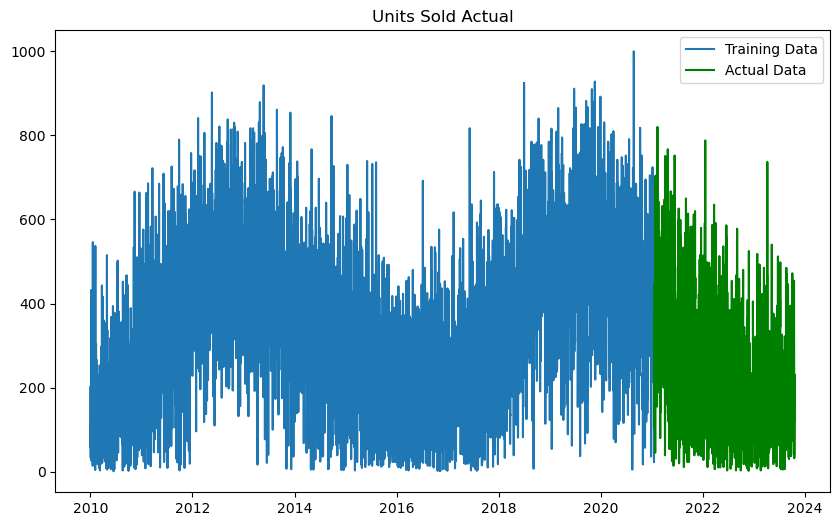

In [10]:
plt.figure(figsize=(10,6))
plt.plot(train['Units Sold'], label='Training Data')
plt.plot(test['Units Sold'], label='Actual Data', color='green')
plt.title('Units Sold Actual')
plt.legend()
plt.show()

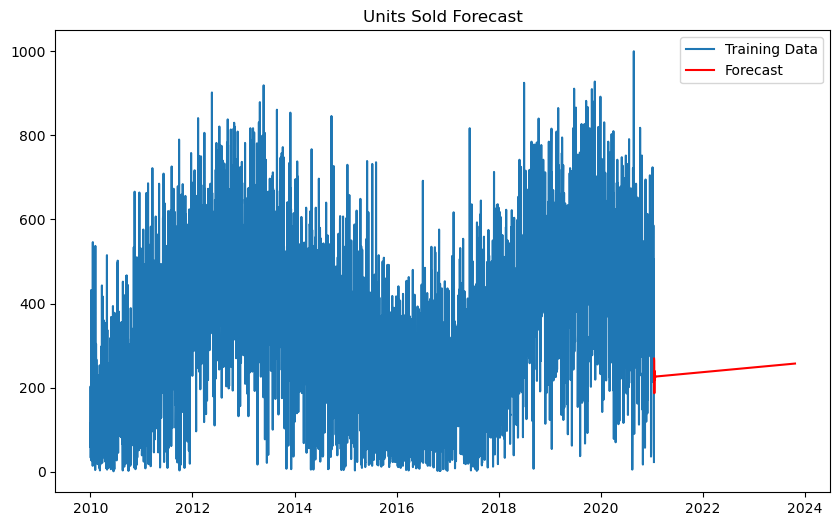

In [11]:
plt.figure(figsize=(10,6))
plt.plot(train['Units Sold'], label='Training Data')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Units Sold Forecast')
plt.legend()
plt.show()

### Exponential smoothing models

#### Single Exponential Smoothing

In [12]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('ProductSalesData.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head(5)

,Date,Stock Level,Discount,Promotion,Units Sold
0,2010-01-01,2381.0,8.506768,Yes,59.0
1,2010-01-02,3252.0,9.283937,No,203.0
2,2010-01-03,2883.0,9.548446,No,33.0
3,2010-01-04,3586.0,9.660054,Yes,117.0
4,2010-01-05,3578.0,9.086065,No,71.0


In [14]:
df['Date'] = pd.to_datetime(df['Date'])  
df.set_index('Date', inplace=True)

In [15]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

In [16]:
model = SimpleExpSmoothing(train['Units Sold'])
model_fit = model.fit()

In [17]:
forecast = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test['Units Sold'], forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['Units Sold'], forecast)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 51464.902909250384
Root Mean Squared Error: 226.85877304889573
Mean Absolute Error: 196.7100853862921


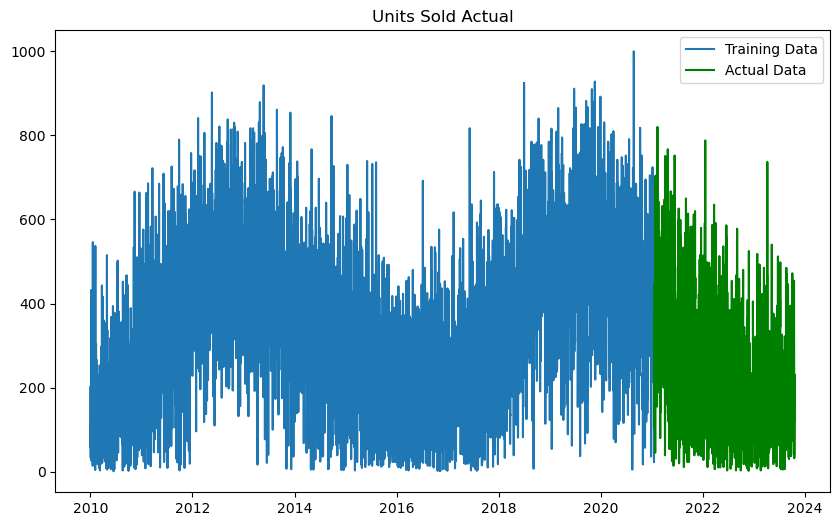

In [18]:
plt.figure(figsize=(10,6))
plt.plot(train['Units Sold'], label='Training Data')
plt.plot(test['Units Sold'], label='Actual Data', color='green')
plt.title('Units Sold Actual')
plt.legend()
plt.show()

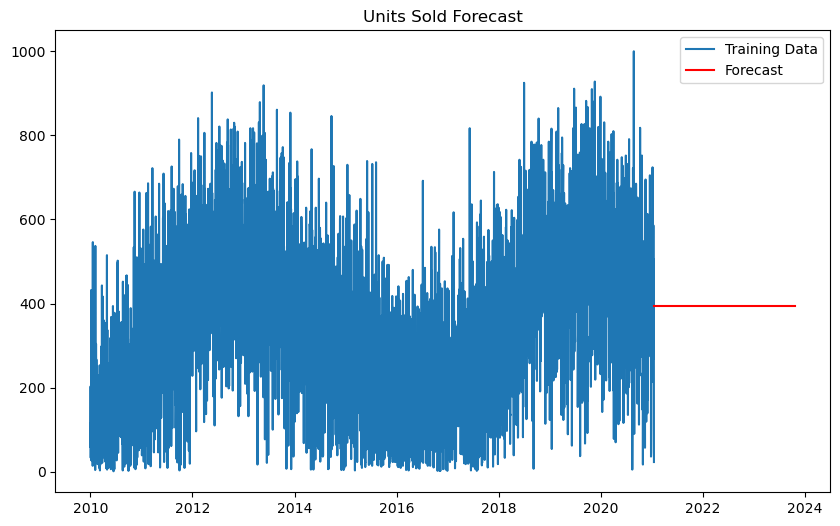

In [19]:
plt.figure(figsize=(10,6))
plt.plot(train['Units Sold'], label='Training Data')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Units Sold Forecast')
plt.legend()
plt.show()

#### Double exponential smoothing

In [20]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('ProductSalesData.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [23]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

In [24]:
model = ExponentialSmoothing(train['Units Sold'], trend='add')
model_fit = model.fit()

In [25]:
forecast = model_fit.forecast(steps=len(test))

In [26]:
mse = mean_squared_error(test['Units Sold'], forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['Units Sold'], forecast)

In [27]:
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 24895.570206366523
Root Mean Squared Error: 157.78330141800976
Mean Absolute Error: 126.78737056967982


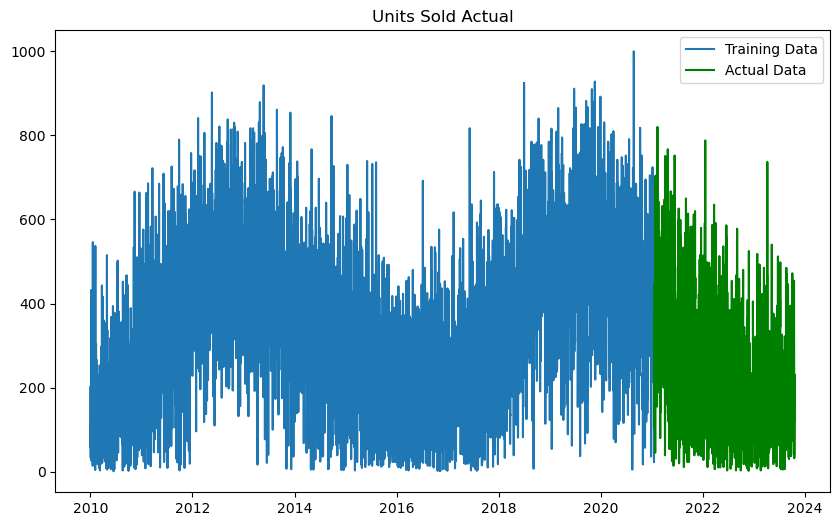

In [28]:
plt.figure(figsize=(10,6))
plt.plot(train['Units Sold'], label='Training Data')
plt.plot(test['Units Sold'], label='Actual Data', color='green')
plt.title('Units Sold Actual')
plt.legend()
plt.show()

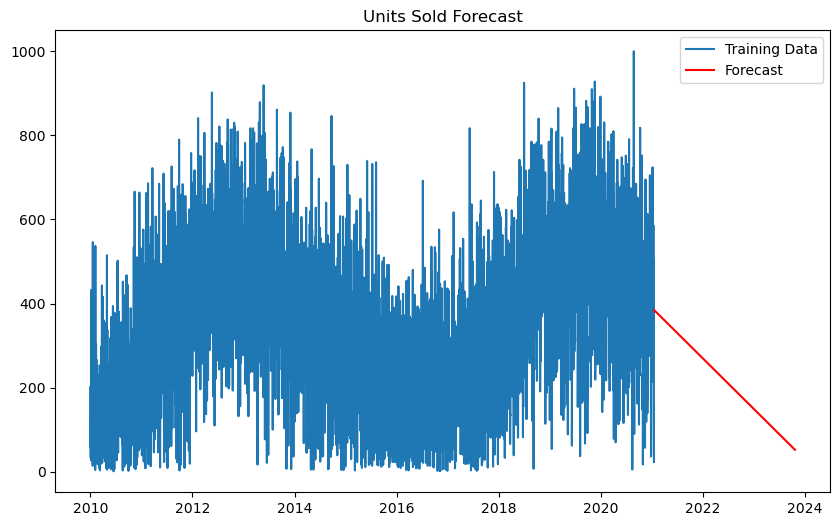

In [29]:
plt.figure(figsize=(10,6))
plt.plot(train['Units Sold'], label='Training Data')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Units Sold Forecast')
plt.legend()
plt.show()

#### Triple exponential smoothing

In [30]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('ProductSalesData.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [32]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [33]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

In [34]:
model = ExponentialSmoothing(train['Units Sold'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

In [35]:
forecast = model_fit.forecast(steps=len(test))

In [36]:
mse = mean_squared_error(test['Units Sold'], forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['Units Sold'], forecast)

In [37]:
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 27021.940978946146
Root Mean Squared Error: 164.38351796620654
Mean Absolute Error: 130.89085365672972


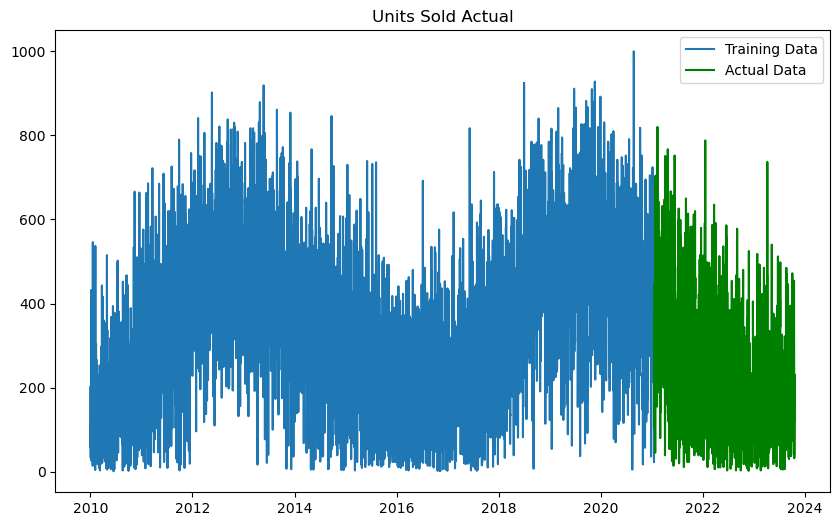

In [38]:
plt.figure(figsize=(10,6))
plt.plot(train['Units Sold'], label='Training Data')
plt.plot(test['Units Sold'], label='Actual Data', color='green')
plt.title('Units Sold Actual')
plt.legend()
plt.show()

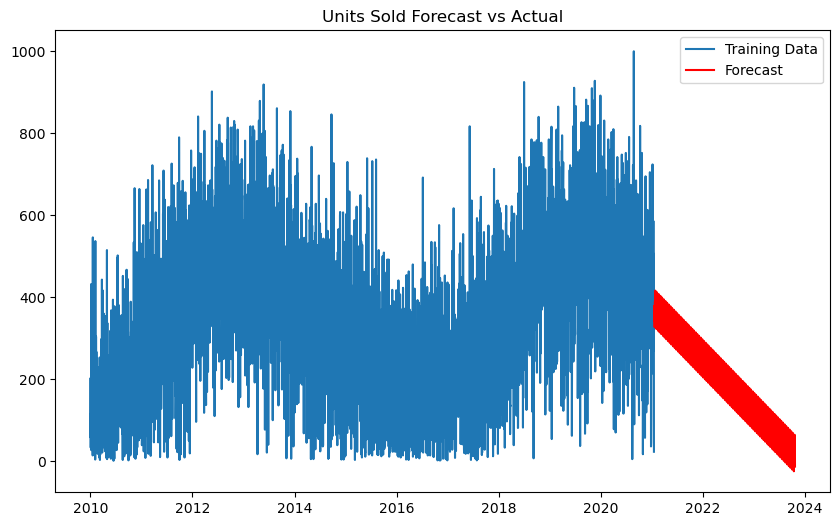

In [39]:
plt.figure(figsize=(10,6))
plt.plot(train['Units Sold'], label='Training Data')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Units Sold Forecast vs Actual')
plt.legend()
plt.show()

### Prophet

In [40]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('ProductSalesData.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [42]:
df = df.rename(columns={'Date': 'ds', 'Units Sold': 'y'})
df['ds'] = pd.to_datetime(df['ds'])

In [43]:
df.drop(columns = ['Stock Level', 'Discount', 'Promotion'], inplace = True)

In [44]:
df.head(5)

,ds,y
0,2010-01-01,59.0
1,2010-01-02,203.0
2,2010-01-03,33.0
3,2010-01-04,117.0
4,2010-01-05,71.0


In [45]:
model = Prophet()
model.fit(df)

10:47:41 - cmdstanpy - INFO - Chain [1] start processing
10:47:43 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
df_future = model.make_future_dataframe(periods=60)  

In [47]:
df_future.head(5)

,ds
0,2010-01-01
1,2010-01-02
2,2010-01-03
3,2010-01-04
4,2010-01-05


In [48]:
forecast = model.predict(df_future)

In [49]:
forecast.tail(5).transpose()

,5096,5097,5098,5099,5100
ds,2023-12-15 00:00:00,2023-12-16 00:00:00,2023-12-17 00:00:00,2023-12-18 00:00:00,2023-12-19 00:00:00
trend,102.720858,102.466673,102.212487,101.958302,101.704116
yhat_lower,-115.654708,-120.051204,-113.380229,-103.859531,-105.176554
yhat_upper,292.686946,275.692268,290.636596,289.121603,284.9885
trend_lower,102.061723,101.741994,101.394817,101.096513,100.820423
trend_upper,102.977941,102.72857,102.483593,102.318948,102.075781
additive_terms,-16.716775,-18.668605,-9.491732,-16.401619,-9.319596
additive_terms_lower,-16.716775,-18.668605,-9.491732,-16.401619,-9.319596
additive_terms_upper,-16.716775,-18.668605,-9.491732,-16.401619,-9.319596
weekly,1.156592,-1.510991,6.74625,-1.263714,4.565318


In [50]:
y_pred = forecast['yhat'][-60:]
y_true = df['y'][-60:]

In [51]:
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

In [52]:
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 25448.002456842965
Root Mean Squared Error: 159.5243005214032
Mean Absolute Error: 124.81341133445848


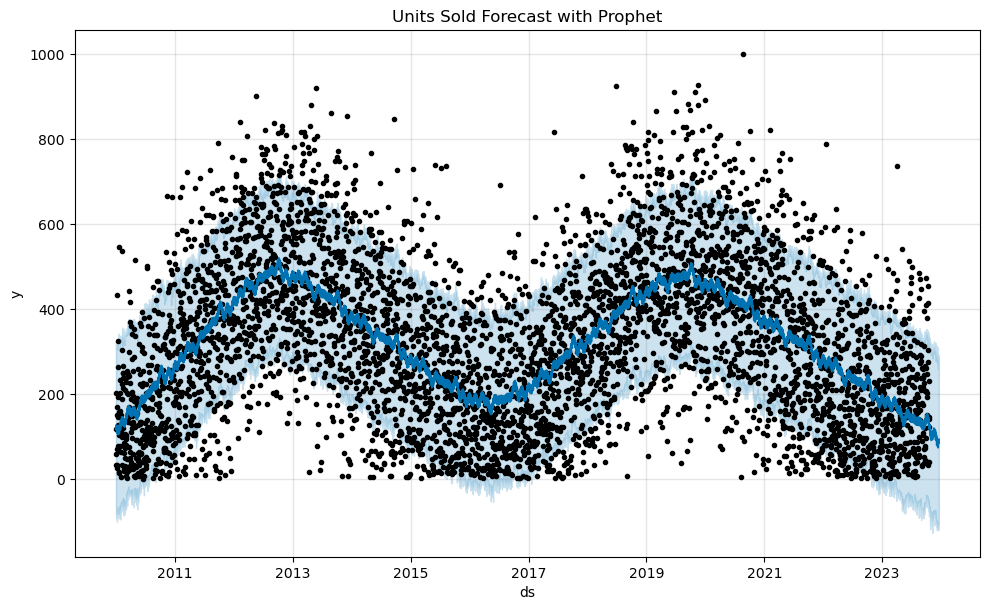

In [53]:
fig = model.plot(forecast)
plt.title('Units Sold Forecast with Prophet')
plt.show()